# Assignment 3: K-means

### Names of group members (max 2):
    Martina (D'Angelo)
    Alfonso (Annarelli)

In [1]:
# importing the required modules
#%pip install numpy matplotlib #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
#%matplotlib inline 

## Part 1: Coding and testing the Kmeans algorithm

### Load and Inspect the Data

In [2]:
## the data set for testing

df = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
                [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24] ])

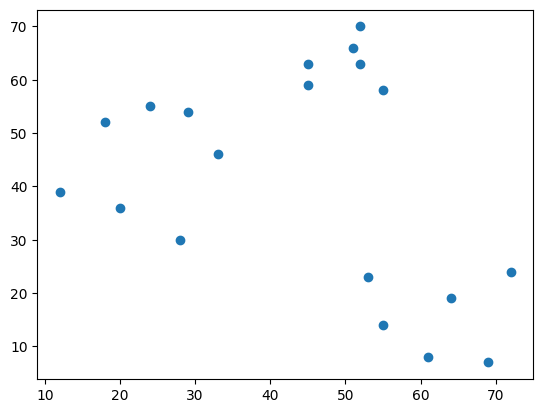

In [ ]:
# Quick scatterplot for yourself, can you imagine what the cluster should be?
print(df.shape)
x=df[0]
y=df[1]

plt.scatter(x,y,marker='o')
plt.show()


### Method 1. Using Kmeans form package sklearn.

<ul>
    <li> Make a plot function that gives the same colour to data points within one cluster. 
    </li>
    <li> Call KMeans from the package. (Consult the sklearn manual online and figure out how to do it.)
    </li>
    <li> Plot next to the data points also the centres of the clusters ($Z_j$)
    </li>
 </ul>

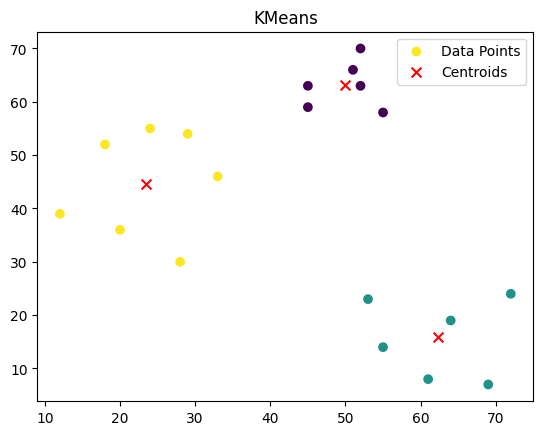

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

k = 3 ## the number of clusters
X=df.T
kmeans =KMeans(n_clusters=k,random_state=42,n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

def plotclusters(data, k, labels, centroids):
    
    plt.scatter(data[:, 0], data[:, 1], c=labels, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x',c='red', s=50, label='Centroids')
    plt.title('KMeans')

    plt.legend()
    plt.show()

plotclusters(X, k, labels, centroids)


### Method 2. Code yourself: A heuristic, simple, fast, pretty good algorithm.

<ol>
    <li> Initialization. Choose k random points as centres; plot the data black, the three centers in colour
    </li>
    <li> Function: assigmnent. Compute for every data point the closest centre: assign the data point to that cluster.
    </li>
    <li> Function: replace. Put all centres as the average of the data in their cluster.
    </li>
    <li> Script. Repeat assignment, replace, plotclusters until nothing changes. 
    </li>
 </ol>

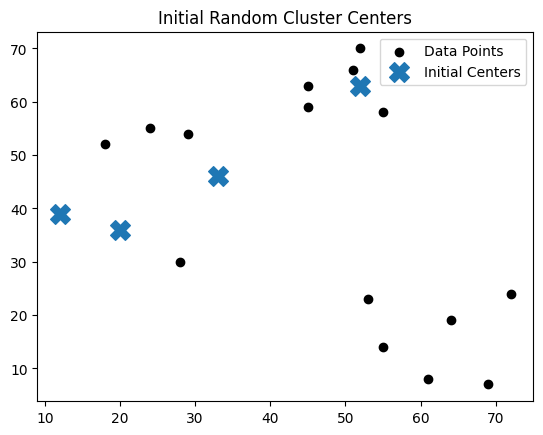

In [12]:
## Part 1. Initialization.
np.random.seed(42)
k = np.random.randint(1,6)
##max_iters = 100

def initialize_centers(data, k):
    np.random.seed(42)
    indices = np.random.choice(data.shape[1], k, replace=False) 
    centers =  data[:, indices].T
    return centers

centers = initialize_centers(df,k)

plt.scatter(df[0], df[1], color='black', marker='o', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1],  marker='X', s=200, label='Initial Centers')
plt.title('Initial Random Cluster Centers')
plt.legend()
plt.show()

In [13]:
## Part 2. Function: assigmnent.
def assignment(data, centers):
    labels = []
    for point in data.T:
        distances = [np.linalg.norm(point - center) for center in centers]  
        labels.append(np.argmin(distances))  # assign closest center
    return np.array(labels)

In [14]:
## Part 3. Function: replace.
def replacement(data, labels, k):
    new_centers = []
    for i in range(k):
        cluster_points = data[:, labels == i]  
        if cluster_points.shape[1] > 0:  #empty clusters
            new_center = np.mean(cluster_points, axis=1)  
            new_centers.append(new_center)
        else:
            new_centers.append(data[:, np.random.randint(0, data.shape[1])]) 
    return np.array(new_centers)


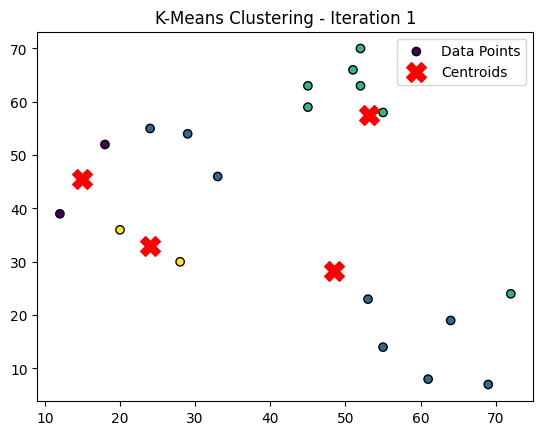

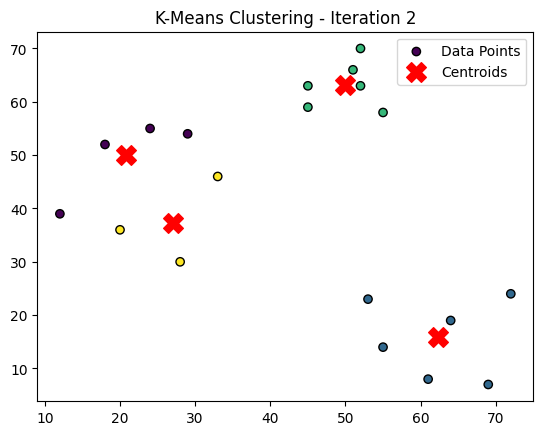

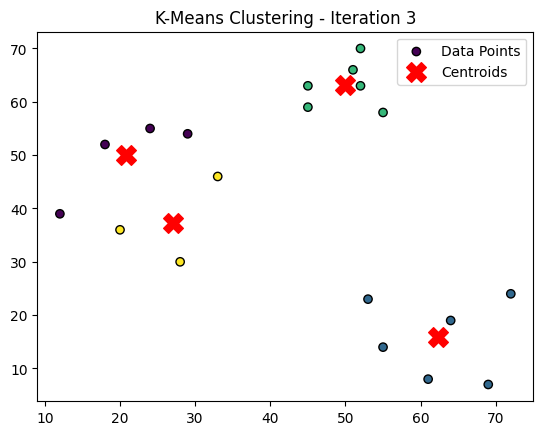

Converged after 3 iterations


In [15]:
## Part 4. Script.
def plotclusters(data, labels, centers, iteration):
    plt.scatter(data[0], data[1], c=labels, cmap='viridis', marker='o', edgecolor='k', label='Data Points')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')  # Plot centers
    plt.title(f'K-Means Clustering - Iteration {iteration}')
    plt.legend()
    plt.show()




def heuristic_kmeans(data, k, max_iters=100):
    centers = initialize_centers(data, k)  # Initialize centers
    for i in range(max_iters):
        labels = assignment(data, centers)  # Assign clusters
        new_centers = replacement(data, labels, k)  # Update centers
        plotclusters(data, labels, new_centers, i + 1)  # Plot progress
        if np.allclose(centers, new_centers):  # Check for convergence
            print(f'Converged after {i+1} iterations')
            break
        centers = new_centers  # Update centers for next iteration
    return labels, centers

labels, centers = heuristic_kmeans(df, k)

# Part 2: Apply Kmeans to Wines database
    
### Let's start by thanking the creators of the dataset that we will be using:

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

## Loading and Inspecting the Data

In [16]:
# importing the required modules
#%pip install numpy matplotlib seaborn pandas scikit-learn #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
#%matplotlib inline 
import pandas as pd
import seaborn as sns

path = "C:/Users/Mardeen/Desktop/UT/machine-learning/2. Logistic_Regression/"

rwine = pd.read_csv(f'{path}/winequality-red.csv', sep=';')  # Makes Pandas objects
wwine = pd.read_csv(f'{path}/winequality-white.csv', sep=';') 

In [17]:
# You may analyse the dataset of the wine of your choosing (red or white):
wines = rwine.sample(frac = 1)

print(wines.columns)
# We just drop the 'quality' from the dataset:
wines_noquality=wines.drop('quality', axis=1)
# the number of samples M in the total combined set is still the same
M = len(wines_noquality)
# the number of features N (excluding the bias) are now all (excluding f='quality'):
N =  wines_noquality.shape[1]
wines_noquality.head() # We will use everything you see here.
X=np.zeros((M,N))
X[0:M,0:N]=wines_noquality[:][0:M]


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Prepare the data and reduce the dimensionelity of the feature space

<ol>
    <li>Feature scaling of all features in the database</li>
    <li>Do a Principle Component Analysis (PCA)</li>
    <li>Reduce the dimensionality of the feature space to 2 by projecting your samples along the first 2 principle component vector</li>
    <li>Plot your samples as a scatter plot in 2d</li>
    </ol>

In [ ]:
# Step 1: feature scaling
...

In [ ]:
# Step 2: PCA analyis
from sklearn.decomposition import PCA
...

In [ ]:
# Step 3: Project samples along PCA directions
...

In [ ]:
# Step 4: Scatterplot of sample in 2d plane spanned by the first 2 PCA vectors
...

### Kmeans cluster analysis in the plane spanned by the first 2 PCA vectors

<ol>
    <li>Do Kmeans clustering with either method 1 or method 2</li>
    <li>As a function of the number of centroids, plot the average distance of each sample to its centroid </li>
    <li>Determine a sensible number of clusters and explain why. You could try the 'elbow method'. What is the problem with not knowing the number of clusters? </li>
    <li>Plot the clusters in a scatterpot with different colors</li>
</ol>

In [ ]:
# Step 1:  Kmeans clustering 
...

In [ ]:
# Step 2:  Average distance to the k centroids
...

In [ ]:
# Step 3: Determine optimal k value
...